# ex 5

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sns.set()
pi = np.pi


In [1]:
def stable_random_variables_a(alpha):
    if alpha == 1:
        Omega = np.random.uniform(-pi/2, pi/2)
        return np.tan(Omega)
    else:
        Omega = np.random.uniform(-pi/2, pi/2)
        W = np.random.exponential(1)
        return np.sin(alpha*Omega)/np.cos(Omega)**(1/alpha)*(np.cos((alpha-1)*Omega)/W)**((1-alpha)/alpha)


def stable_random_variables_b(alpha, beta):
    Omega = np.random.uniform(-pi/2, pi/2)
    W = np.random.exponential(1)
    Delta_0 = np.arctan(beta*np.tan(pi*alpha/2))/alpha

    if alpha == 1:
        return 2/pi*((pi/2+beta*Omega)*np.tan(Omega)-beta*np.log(pi/2*W*np.cos(Omega)/(pi/2+beta*Omega)))
    else:
        a = np.sin(alpha*(Delta_0+Omega)) / \
            (np.cos(alpha*Delta_0)*np.cos(Omega))**(1/alpha)
        b = (np.cos(alpha*Delta_0+(alpha-1)*Omega)/W)**((1-alpha)/alpha)
        return a*b


def stable_random_variables_0(alpha, beta, gamma, delta):
    Z = stable_random_variables_a(alpha, beta)
    if alpha == 1:
        return gamma*Z+delta
    else:
        return gamma*(Z - beta*np.tan(pi*alpha/2)) + delta


def stable_random_variables_1(alpha, beta, gamma, delta):
    Z = stable_random_variables_b(alpha, beta)
    if alpha == 1:
        return gamma*Z + (delta + beta*2/pi*gamma*np.log(gamma))
    else:
        return gamma*Z+delta


def stable_random_variables(alpha, beta, gamma=1, delta=0, stable_type=1):
    if stable_type == 1:
        return stable_random_variables_1(alpha, beta, gamma, delta)
    elif stable_type == 0:
        return stable_random_variables_0(alpha, beta, gamma, delta)
    else:
        raise ValueError("Select bad stable_type!!!")


def multivariate_stable_distributions(alpha, array):
    n = array.shape[0]
    Z = [stable_random_variables(alpha=alpha, beta=1) for _ in range(n)]
    y = np.random.uniform(0, 1)
    if alpha == 1:
        return np.sum(array[:, 1:].T*array[:, 0]**(1/alpha) * Z, axis=1)
    else:
        return np.sum(array[:, 1:].T*array[:, 0]**(1/alpha)*(Z + 2/pi*np.log(array[:, 0])), axis=1)


In [43]:
def codiffence(X, Y):
    # XminusY = np.array([X - Y_i for Y_i in Y])
    XminusY = X - Y
    EexpX = np.mean(np.exp(1j*X))
    EexpY = np.mean(np.exp(-1j*Y))

    EexpXminusY = np.mean(np.exp(1j*XminusY))
    tau = np.log(EexpXminusY) - np.log(EexpX) - np.log(EexpY)
    return tau


In [257]:
def sub_gaussian_not_sim(alpha, sigmas=[1, 1], size=[1, 1]):
    beta = 1
    gamma = np.cos(pi*alpha/4)**(2/alpha)
    delta = 0
    sigmas = 1
    
    sqrt_A = [[stable_random_variables(
        alpha/2, beta, gamma, delta)**(1/2)] for _ in range(size[0])]
    return sqrt_A * np.random.normal(0, sigmas, size)


In [272]:
def sub_gaussian_not_sim(alpha, beta, gamma, delta
                        ,sigma_matrix=[[1, 0], [0, 1]], mean_matrix = [0, 0], n = 1):

    G = np.random.default_rng().multivariate_normal(mean_matrix, sigma_matrix, n)
    
    sqrt_A = [[stable_random_variables(
        alpha/2, beta, gamma, delta)**(1/2)] for _ in range(n)]
    return sqrt_A * G


In [274]:
alpha = 1.1
beta = 1
gamma = np.cos(pi*alpha/4)**(2/alpha)
delta = 0
sigmas = 1
sub_gaussian_not_sim(alpha, beta, gamma, delta
                        ,sigma_matrix=[[1, 0], [0, 1]], mean_matrix = [0, 0], n = 3)

array([[-1.2370652 ,  1.29937971],
       [-0.10581673, -2.40222839],
       [-1.45615557,  1.08747675]])

In [45]:
alpha = 1.1
beta = 1
gamma = np.cos(pi*alpha/4)**(2/alpha)
delta = 0
sigmas = 1
d = 2
n = 5000

X_5_1 = sub_gaussian_not_sim(alpha, beta, gamma, delta, sigmas, size=[n, d])


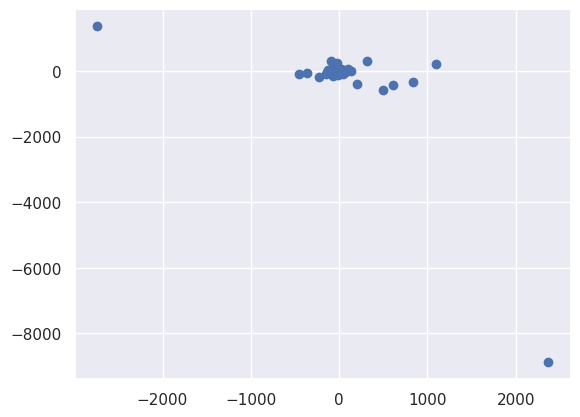

In [46]:
plt.scatter(X_5_1[:, 0], X_5_1[:, 1])
plt.show()


In [48]:
codiffence(X_5_1[:, 0], X_5_1[:, 1])


(0.35551003479264875-0.007050127047829481j)

In [206]:
mean = [0, 0]
Sigma = [[1, 0.5],
         [0.5, 1]]

Z = np.random.default_rng().multivariate_normal(mean, Sigma, 10000)

In [205]:
np.cov(Z.T)

array([[1.01384506, 0.49224996],
       [0.49224996, 0.99338791]])

In [216]:
codiffence(Z[:, 0], Z[:, 1])

(0.5262983966825403-0.013680910841946925j)

In [246]:
alpha = 1.9
arr1 = np.array([
    [1/4, 1,  0],
    [1/4, 0,  1],
    [1/4, -1,  0],
    [1/4, 0, -1],
])


In [247]:
X = np.array([multivariate_stable_distributions(alpha, arr1)
             for _ in range(100000)])


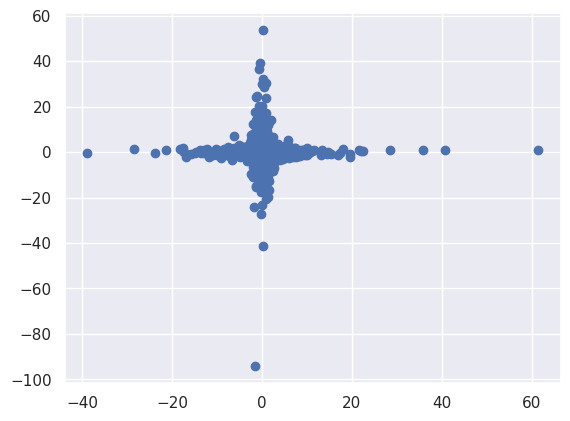

In [249]:
plt.scatter(X[:, 0], X[:, 1])
plt.show()

In [251]:
np.cov(X.T)

array([[ 1.34506101e+00, -3.40860005e-04],
       [-3.40860005e-04,  1.48655113e+00]])

In [252]:
codiffence(X[:, 0], X[:, 1])


(-0.003994949104407286-0.0002680568997827375j)

In [253]:
alpha = 1.6
arr2 = np.array([
    [1/4, np.sqrt(2)/2,  np.sqrt(2)/2],
    [1/4, -np.sqrt(2)/2,  np.sqrt(2)/2],
    [1/4, -np.sqrt(2)/2, -np.sqrt(2)/2],
    [1/4, np.sqrt(2)/2, -np.sqrt(2)/2],
])
X2 = np.array([multivariate_stable_distributions(alpha, arr2)
             for _ in range(100000)])

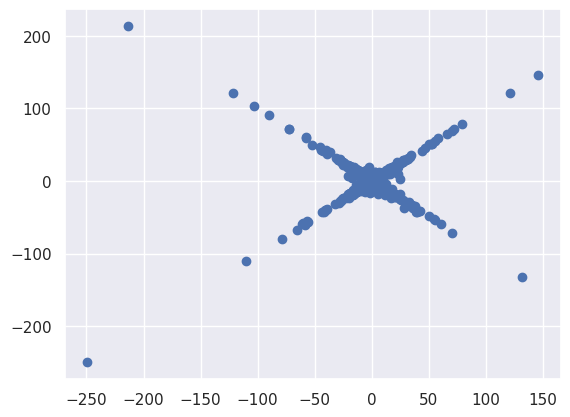

In [254]:
plt.scatter(X2[:, 0], X2[:, 1])
plt.show()

In [255]:
np.cov(X2.T)

array([[6.63758602, 0.32716555],
       [0.32716555, 6.6113947 ]])

In [256]:
codiffence(X2[:, 0], X2[:, 1])


(0.2706888902893456+0.00270407671925814j)

In [267]:
X3 = sub_gaussian_not_sim(1.6, [1, 1], size = [100000,2])

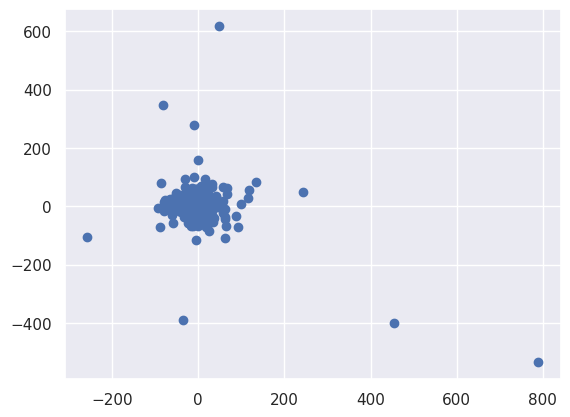

In [268]:
plt.scatter(X3[:, 0], X3[:, 1])
plt.show()

In [269]:
np.cov(X3.T)

array([[15.22896401, -5.54669488],
       [-5.54669488, 17.85265926]])

In [270]:
codiffence(X3[:, 0], X3[:, 1])


(0.14840157771726148-0.004539576970215767j)